<a href="https://colab.research.google.com/github/GerardoMayel/Machine_Learning_Credit_Card_Approval_Prediction/blob/main/Credit_Card_Approval_Prediction_Machine_Learning_Model_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!ls

drive  sample_data


In [5]:
%cd drive

/content/drive


In [6]:
!ls

MyDrive


In [7]:
%cd 'MyDrive/Machine Learning/data'

/content/drive/MyDrive/Machine Learning/data


In [8]:
!ls

application_record.csv	credit_record.csv  salarios.csv      titanic-train.csv
canciones-2018.csv	diabetes.csv	   titanic-test.csv


In [9]:
ds_application_record = pd.read_csv('application_record.csv')
ds_credit_record = pd.read_csv('credit_record.csv')

In [10]:
print(ds_application_record.head(5))
print(ds_credit_record.head(100))

        ID CODE_GENDER  ... OCCUPATION_TYPE CNT_FAM_MEMBERS
0  5008804           M  ...             NaN             2.0
1  5008805           M  ...             NaN             2.0
2  5008806           M  ...  Security staff             2.0
3  5008808           F  ...     Sales staff             1.0
4  5008809           F  ...     Sales staff             1.0

[5 rows x 18 columns]
         ID  MONTHS_BALANCE STATUS
0   5001711               0      X
1   5001711              -1      0
2   5001711              -2      0
3   5001711              -3      0
4   5001712               0      C
..      ...             ...    ...
95  5001715             -35      X
96  5001715             -36      X
97  5001715             -37      X
98  5001715             -38      X
99  5001715             -39      X

[100 rows x 3 columns]


In [11]:
ds_application_record.shape

(438557, 18)

In [12]:
ds_credit_record.shape

(1048575, 3)

In [13]:
df_application_record = pd.DataFrame(data=ds_application_record)
df_credit_record = pd.DataFrame(data=ds_credit_record)

# Credit Record MetaData Column Status
# 0: 1-29 days past due 
# 1: 30-59 days past due 
# 2: 60-89 days overdue 
# 3: 90-119 days overdue 
# 4: 120-149 days overdue 
# 5: Overdue or bad debts, write-offs for more than 150 days 
# C: paid off that month 
# X: No loan for the month

In [14]:
df_credit_record.STATUS.unique()

array(['X', '0', 'C', '1', '2', '3', '4', '5'], dtype=object)

In [15]:
bads = ['3','4','5']

In [16]:
df_application_record.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [17]:
df_credit_record.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


##Performance and Sample Windows and Bad Definition
Basel II required a 12-month prediction window.
Credit Card Accounts typically mature after 18 to 24 months

In [18]:
df_credit_record.MONTHS_BALANCE.unique()

array([  0,  -1,  -2,  -3,  -4,  -5,  -6,  -7,  -8,  -9, -10, -11, -12,
       -13, -14, -15, -16, -17, -18, -19, -20, -21, -22, -23, -24, -25,
       -26, -27, -28, -29, -30, -31, -32, -33, -34, -35, -36, -37, -38,
       -39, -40, -41, -42, -43, -44, -45, -46, -47, -48, -49, -50, -51,
       -52, -53, -54, -55, -56, -57, -58, -59, -60])

In [19]:
#Unique_id
print(len(df_credit_record.ID.unique()))

45985


In [20]:
#Unique_id
print(len(df_application_record.ID.unique()))

438510


In [21]:
df_cr_24months = df_credit_record.loc[df_credit_record.MONTHS_BALANCE >= -48]
df_cr_24months

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C
...,...,...,...
1048570,5150487,-25,C
1048571,5150487,-26,C
1048572,5150487,-27,C
1048573,5150487,-28,C


In [22]:
df_cr_24months['flag_bads'] = df_cr_24months['STATUS'].apply(lambda x: 1 if (x=='3' or x=='4'or x=='5') else 0)
df_cr_24months

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,ID,MONTHS_BALANCE,STATUS,flag_bads
0,5001711,0,X,0
1,5001711,-1,0,0
2,5001711,-2,0,0
3,5001711,-3,0,0
4,5001712,0,C,0
...,...,...,...,...
1048570,5150487,-25,C,0
1048571,5150487,-26,C,0
1048572,5150487,-27,C,0
1048573,5150487,-28,C,0


In [23]:
df_bads = df_cr_24months.groupby(['ID']).agg("mean")
df_bads['flag_bads'] = df_bads['flag_bads'].apply(lambda x: 1 if x>0 else 0)
df_bads

,MONTHS_BALANCE,flag_bads
ID,,
5001711,-1.5,0
5001712,-9.0,0
5001713,-10.5,0
5001714,-7.0,0
5001715,-24.0,0
...,...,...
5150482,-19.5,0
5150483,-8.5,0
5150484,-6.0,0


In [24]:
df_bads = df_bads.drop(['MONTHS_BALANCE'], axis=1)
df_bads

,flag_bads
ID,
5001711,0
5001712,0
5001713,0
5001714,0
5001715,0
...,...
5150482,0
5150483,0
5150484,0


In [25]:
print(df_bads['flag_bads'].sum())
print(df_cr_24months['flag_bads'].sum())

324
2189


In [30]:
#Merging Dataframes
df_model = df_application_record.merge(df_bads, how='left', on='ID')
df_model

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,flag_bads
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,0.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,0.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,0.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,0.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,M,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,1,0,0,0,NaN,1.0,NaN
438553,6840222,F,N,N,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-15939,-3007,1,0,0,0,Laborers,1.0,NaN
438554,6841878,F,N,N,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,-8169,-372,1,1,0,0,Sales staff,1.0,NaN
438555,6842765,F,N,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21673,365243,1,0,0,0,NaN,2.0,NaN


In [33]:
df_model_0 = df_model.loc[df_model['flag_bads'].notnull()]
df_model_0

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,flag_bads
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,0.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,0.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,0.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,0.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434808,5149828,M,Y,Y,0,315000.0,Working,Secondary / secondary special,Married,House / apartment,-17348,-2420,1,0,0,0,Managers,2.0,1.0
434809,5149834,F,N,Y,0,157500.0,Commercial associate,Higher education,Married,House / apartment,-12387,-1325,1,0,1,1,Medicine staff,2.0,1.0
434810,5149838,F,N,Y,0,157500.0,Pensioner,Higher education,Married,House / apartment,-12387,-1325,1,0,1,1,Medicine staff,2.0,1.0
434811,5150049,F,N,Y,0,283500.0,Working,Secondary / secondary special,Married,House / apartment,-17958,-655,1,0,0,0,Sales staff,2.0,0.0


In [36]:
#Identifying Categorical columns
categorical_cols = [cname for cname in df_model_0.columns if 
                    df_model_0[cname].nunique() < 20 and
                    df_model_0[cname].dtype == 'object']
categorical_cols

['CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE']

In [51]:
numerical_cols = [cname for cname in df_model_0.columns if 
                  df_model_0[cname].dtype in ['int64', 'float64'] ]
numerical_cols = [elements for elements in numerical_cols if not (elements in ['ID'])]
numerical_cols

['CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'FLAG_MOBIL',
 'FLAG_WORK_PHONE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS',
 'flag_bads']

In [52]:
model_columns = categorical_cols + numerical_cols
model_columns

['CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'FLAG_MOBIL',
 'FLAG_WORK_PHONE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS',
 'flag_bads']

In [53]:
df_model_predictors = df_model_0[model_columns]
df_model_predictors

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,flag_bads
0,M,Y,Y,Working,Higher education,Civil marriage,Rented apartment,NaN,0,427500.0,-12005,-4542,1,1,0,0,2.0,0.0
1,M,Y,Y,Working,Higher education,Civil marriage,Rented apartment,NaN,0,427500.0,-12005,-4542,1,1,0,0,2.0,0.0
2,M,Y,Y,Working,Secondary / secondary special,Married,House / apartment,Security staff,0,112500.0,-21474,-1134,1,0,0,0,2.0,0.0
3,F,N,Y,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,Sales staff,0,270000.0,-19110,-3051,1,0,1,1,1.0,0.0
4,F,N,Y,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,Sales staff,0,270000.0,-19110,-3051,1,0,1,1,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434808,M,Y,Y,Working,Secondary / secondary special,Married,House / apartment,Managers,0,315000.0,-17348,-2420,1,0,0,0,2.0,1.0
434809,F,N,Y,Commercial associate,Higher education,Married,House / apartment,Medicine staff,0,157500.0,-12387,-1325,1,0,1,1,2.0,1.0
434810,F,N,Y,Pensioner,Higher education,Married,House / apartment,Medicine staff,0,157500.0,-12387,-1325,1,0,1,1,2.0,1.0
434811,F,N,Y,Working,Secondary / secondary special,Married,House / apartment,Sales staff,0,283500.0,-17958,-655,1,0,0,0,2.0,0.0


In [57]:
dummy_encoded_train_predictors = pd.get_dummies(df_model_predictors)

In [58]:
df_model = dummy_encoded_train_predictors
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36170 entries, 0 to 434812
Data columns (total 55 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   CNT_CHILDREN                                       36170 non-null  int64  
 1   AMT_INCOME_TOTAL                                   36170 non-null  float64
 2   DAYS_BIRTH                                         36170 non-null  int64  
 3   DAYS_EMPLOYED                                      36170 non-null  int64  
 4   FLAG_MOBIL                                         36170 non-null  int64  
 5   FLAG_WORK_PHONE                                    36170 non-null  int64  
 6   FLAG_PHONE                                         36170 non-null  int64  
 7   FLAG_EMAIL                                         36170 non-null  int64  
 8   CNT_FAM_MEMBERS                                    36170 non-null  float64
 9   flag_

In [60]:
x_model = [xcol for xcol in df_model if not(xcol=='flag_bads')]
y_model = [ycol for ycol in df_model if ycol=='flag_bads']
print(x_model)
print(y_model)

['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'CODE_GENDER_F', 'CODE_GENDER_M', 'FLAG_OWN_CAR_N', 'FLAG_OWN_CAR_Y', 'FLAG_OWN_REALTY_N', 'FLAG_OWN_REALTY_Y', 'NAME_INCOME_TYPE_Commercial associate', 'NAME_INCOME_TYPE_Pensioner', 'NAME_INCOME_TYPE_State servant', 'NAME_INCOME_TYPE_Student', 'NAME_INCOME_TYPE_Working', 'NAME_EDUCATION_TYPE_Academic degree', 'NAME_EDUCATION_TYPE_Higher education', 'NAME_EDUCATION_TYPE_Incomplete higher', 'NAME_EDUCATION_TYPE_Lower secondary', 'NAME_EDUCATION_TYPE_Secondary / secondary special', 'NAME_FAMILY_STATUS_Civil marriage', 'NAME_FAMILY_STATUS_Married', 'NAME_FAMILY_STATUS_Separated', 'NAME_FAMILY_STATUS_Single / not married', 'NAME_FAMILY_STATUS_Widow', 'NAME_HOUSING_TYPE_Co-op apartment', 'NAME_HOUSING_TYPE_House / apartment', 'NAME_HOUSING_TYPE_Municipal apartment', 'NAME_HOUSING_TYPE_Office apartment', 'NAME_HOUSING_TYPE_Rented apartment', 'NAM

In [67]:
x = df_model[x_model].values
y = df_model[y_model].values
x

array([[ 0.0000e+00,  4.2750e+05, -1.2005e+04, ...,  0.0000e+00,
         0.0000e+00,  0.0000e+00],
       [ 0.0000e+00,  4.2750e+05, -1.2005e+04, ...,  0.0000e+00,
         0.0000e+00,  0.0000e+00],
       [ 0.0000e+00,  1.1250e+05, -2.1474e+04, ...,  0.0000e+00,
         1.0000e+00,  0.0000e+00],
       ...,
       [ 0.0000e+00,  1.5750e+05, -1.2387e+04, ...,  0.0000e+00,
         0.0000e+00,  0.0000e+00],
       [ 0.0000e+00,  2.8350e+05, -1.7958e+04, ...,  0.0000e+00,
         0.0000e+00,  0.0000e+00],
       [ 0.0000e+00,  1.1250e+05, -9.1880e+03, ...,  0.0000e+00,
         0.0000e+00,  0.0000e+00]])

In [66]:
y

array([[0.],
       [0.],
       [0.],
       ...,
       [1.],
       [0.],
       [0.]])

In [68]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.25, random_state=0 )

In [69]:
logreg = LogisticRegression(max_iter=100000)
logreg.fit(X_train, Y_train)
y_pred = logreg.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [70]:
cnf_matrix = metrics.confusion_matrix(Y_test, y_pred)
cnf_matrix

array([[8967,    0],
       [  76,    0]])

Text(0.5, 257.44, 'Etiqueta de Predicción')

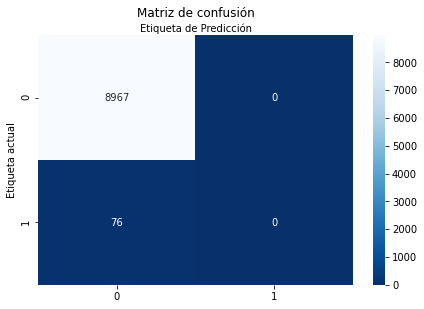

In [71]:
class_names = [0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap= 'Blues_r', fmt= 'g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Matriz de confusión', y = 1.1)
plt.ylabel('Etiqueta actual')
plt.xlabel('Etiqueta de Predicción')

In [72]:
logreg.score(X_test, Y_test)

0.9915957093884773